<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tratamiento-de-outliers-o-valores-perdidos" data-toc-modified-id="Tratamiento-de-outliers-o-valores-perdidos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tratamiento de <em>outliers</em> o valores perdidos</a></span></li><li><span><a href="#Eliminar-outliers" data-toc-modified-id="Eliminar-outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eliminar <em>outliers</em></a></span></li><li><span><a href="#Reemplazar" data-toc-modified-id="Reemplazar-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reemplazar</a></span></li></ul></div>

# Tratamiento de *outliers* o valores perdidos

Los *outliers* o valores perdidos son observaciones anormales en nuestros datos que puede afectar potencialmente nuestros análisis. 

> Es decir, un *outlier* es una observación dentro de nuestros datos que nos es consistente con el resto, que se escapa. 

Imaginemos que estamos midiendo el peso de las alumnas de una clase y son los siguientes:

```python
pesos = [92.31, 76.4, 87.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```

- el peso máximo es de 92.31


- el peso mínimo es de 60.86


- la media del peso de la clase sería 77.085. 


- la distancia del máximo y del mínimo a la media es de 14.504 y 16.94 respectivamente. 

**Como vemos la media se sitúa en la mitad del intervalo y nos podría dar una muy buena estimación del peso de la clase** 


Imaginemos ahora que el peso de los 10 las alumnas son: 

```python
pesos2 = [92.31, 76.4, 117.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```
En este caso: 

- el peso máximo es de 117.3


- el peso mínimo es de 60.86


- la media del peso de la clase sería 80.805. 


- la distancia del máximo y del mínimo a la media es de 36.49 y 19.94 respectivamente. 

**En este caso la media ya no está situada aproximadamente en la mitad del intervalo**. El efecto de la alumna que tiene un mayor perso ha hecho que la media aritmética se haya desplazado hacia el valor máximo y por lo tanto ya no es tan buena representación de como se reparten los pesos en la clase.  


Es en este caso, cuando el tratamiento de los *outliers* debe ser solucionado. Esto lo podemos hacer de distintas formas: 

- Eliminación de esos registros 


- Reemplazar por la media, mediana, moda...


- Mantenerlos (si el problema a resolver tiene que ver con outliers). 


Pero antes de ponernos a quitar datos o reemplazarlos tenemos que identificar cuales son los *outliers* en nuestro datos. 

- Lo podemos hacer visualmente usando un `boxplot`. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/insurance.csv", index_col = 0)

In [4]:
# seleccionamos solo aquellas variables numéricas

df_numericas = df.select_dtypes(include=np.number)

In [5]:
df_numericas.head(2)

,age,bmi,children,charges
0,19.0,27.90,0,16884.9240
1,18.0,33.77,1,1725.5523


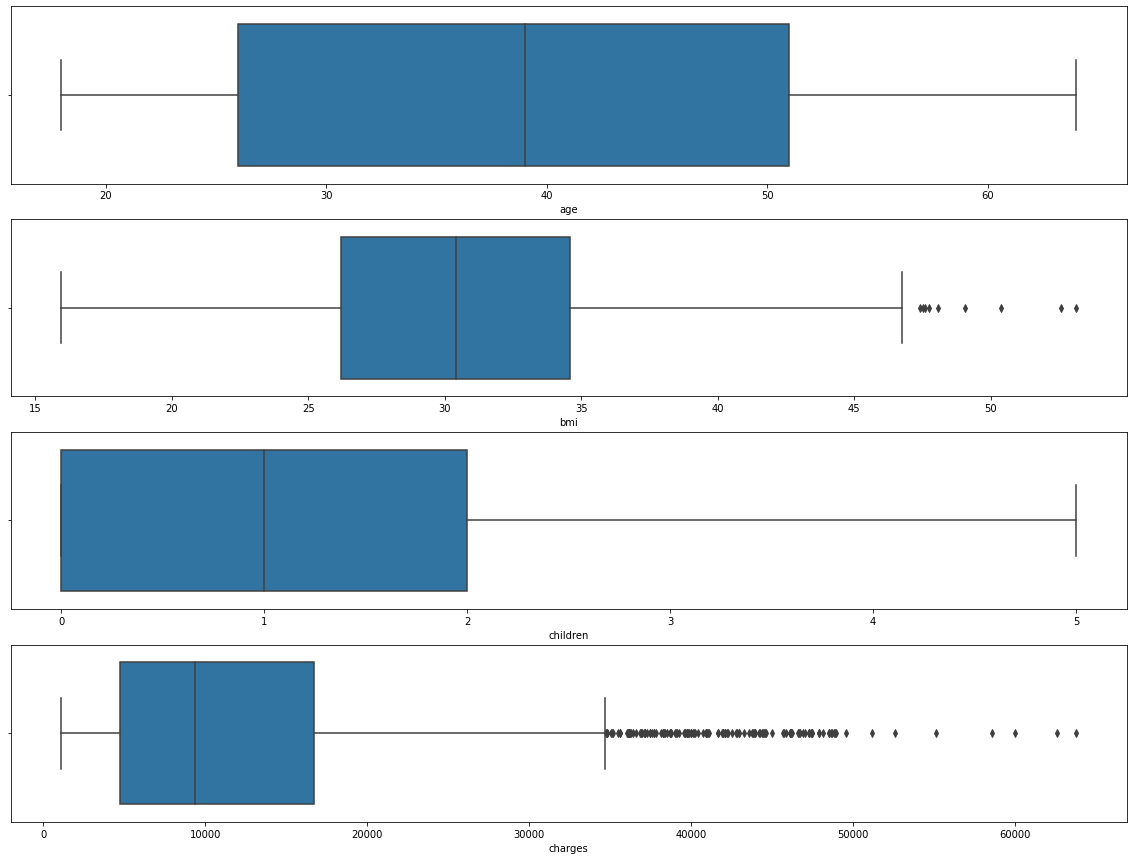

In [6]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

Hemos identificado visualmente los *outliers* en nuestras variables numéricas, pero en realidad no sabemos que valores son los que son los *outliers*. ¿Cómo lo podríamos hacer?

Calcularemos  el rango intercuartílico (IQR) siguiendo los siguientes pasos: 

- Calcular el primer cuartil (Q1, 25%): donde el 25% de los datos son menores o iguales al valor del Q1. 


- Calcular el tercer cuartil (Q3, 75%): donde el 75% de los datos son menores o iguales al valor de Q3


- Calcular el rango intercuartil (IQR), es la diferencia entre el Q3 y Q1

```
IQR  = Q3 - Q1
```

> Todos los valors que sean **menores que `Q1 - 1.5IQR`** o **mayores que `Q3 + 1.5IQR`** serán considerados outliers. 

**Empecemos con la variable `bmi`**

Para calcular los cuartiles recurriremos a la librería NumPy donde encontratemos los siguientes métodos: 

- `np.percentile`: lo usaremos cuando **no** tengamos **nan** entre nuestros valores. 


- `np.nanpercentile`: lo usaremos cuando tengamos nan entre nuestros valores. 

En ambos casos tendremos que pasarle: 

- La columna sobre la que queramos calcular los cuartiles 


- El cuartil que queremos calcular. 

In [7]:
# cálculo del Q1
Q1 = np.nanpercentile(df['bmi'], 25)
Q1

26.22

In [8]:
# cálculo del Q3
Q3 = np.nanpercentile(df['bmi'], 75)
Q3

34.6

In [9]:
#calculemos el IQR 

IQR = Q3 - Q1
IQR

8.380000000000003

In [10]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

12.570000000000004

Ahora es el momento de filtrar nuestros datos filtrar/eliminar aquellos datos que sean *outliers*, es decir, vamos a crearnos un *dataframe* con los datos que cumplan dos condiciones: 

- Que sean menor que el valor de Q1 - outlier_step


- Que sean mayores que el valor de Q3 + outlier_step

In [11]:
outliers_data = df[(df["bmi"] < Q1 - outlier_step) | (df["bmi"] > Q3 + outlier_step)]

In [12]:
outliers_data

,age,sex,bmi,children,smoker,region,charges
116,58.0,male,49.06,0,no,southeast,11381.32540
286,46.0,female,48.07,2,no,northeast,9432.92530
401,47.0,male,47.52,1,no,southeast,8083.91980
543,54.0,female,47.41,0,yes,southeast,63770.42801
847,23.0,male,50.38,1,no,southeast,2438.05520
860,37.0,female,47.60,2,yes,southwest,46113.51100
1047,22.0,male,52.58,1,yes,southeast,44501.39820
1088,52.0,male,47.74,1,no,southeast,9748.91060
1317,18.0,male,53.13,0,no,southeast,1163.46270


In [13]:
# sacamos los índices de los outliers, para saber que filas son las que tienen los outliers
x = list(outliers_data.index)
x 

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]

Pero esto es un poco rollo si tuvieramos que ejecutar todas estas líneas para cada columna numérica, por lo que vamos a crearnos una función: 

In [14]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [15]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [16]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'bmi': [116, 286, 401, 543, 847, 860, 1047, 1088, 1317], 'charges': [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]}


Ahora ya podremos hacer el tratamiento correcto de los *outliers*, como comentabamos un poco más arriba: 

- Eliminarlos

- Reemplazarlos

- Mantenerlos. 

# Eliminar *outliers* 

En este caso solo vamos a necesitar los índices. Por lo que necesitamos acceder a los valores de nuestro diccionario, para luego usarlos para elminarlos. 

In [17]:
# sacamos los valores de nuestro diccionario. 

valores = list(ind.values())

In [18]:
# pero ojo!! Esto es una lista de listas, por lo que necesitaremos aplanarla, ya que el método drop acepta listas.

print(valores)

[[116, 286, 401, 543, 847, 860, 1047, 1088, 1317], [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]]


In [19]:
# hacemos una list comprehension para aplanar nuestra lista de listas

valores = [indice for sublista in valores for indice in sublista]
print(valores)

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317, 14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]


In [20]:
valores = set(valores)

In [21]:
print(valores)

{1031, 524, 1036, 14, 1037, 530, 19, 23, 1047, 1049, 29, 30, 543, 34, 549, 38, 39, 1062, 558, 1070, 49, 53, 55, 569, 1088, 577, 1090, 1096, 587, 82, 84, 86, 1111, 1117, 94, 1118, 609, 1122, 1124, 615, 109, 621, 1139, 116, 629, 1146, 123, 1152, 1156, 146, 665, 667, 668, 158, 161, 674, 1186, 677, 682, 175, 689, 1206, 1207, 185, 697, 706, 1218, 203, 1230, 725, 1240, 1241, 223, 736, 1249, 738, 739, 742, 240, 242, 759, 251, 252, 254, 256, 1284, 263, 1288, 265, 1291, 271, 1300, 1301, 1303, 281, 286, 288, 1313, 803, 292, 1317, 298, 1323, 819, 312, 314, 826, 828, 322, 327, 328, 330, 842, 845, 847, 338, 850, 852, 856, 860, 883, 373, 377, 381, 893, 901, 401, 917, 420, 421, 422, 947, 951, 441, 953, 956, 958, 476, 488, 500, 1012, 1021, 1022}


In [22]:
df.shape

(1338, 7)

In [23]:
# nos hacems¡os una copia del dataframe original

df_sin_outliers2 = df.copy()

In [24]:
# eliminamos usando la lista de índices las filas que hemos identificado como outliers. 

final = df_sin_outliers2.drop(df_sin_outliers2.index[list(valores)] )

Por último chequeamos las filas del *dataframe* nuevo y comprobamos si se han borrado los registros que queríamos. 

In [25]:
final.shape

(1195, 7)

# Reemplazar

También podemos reemplazar los valores de los *outliers* por la media o la mediana. Recordamos que la función para detectar los *outliers* nos devolvía un diccionario, donde las *keys* eran el nombre de las columnas y los *values* la lista de los índices donde tenemos nulos. 

In [26]:
print(ind)

{'bmi': [116, 286, 401, 543, 847, 860, 1047, 1088, 1317], 'charges': [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]}


In [27]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    if k == "bmi":
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  
    else: 
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 
        

In [28]:
df_numericas2 = df.select_dtypes(include = np.number)

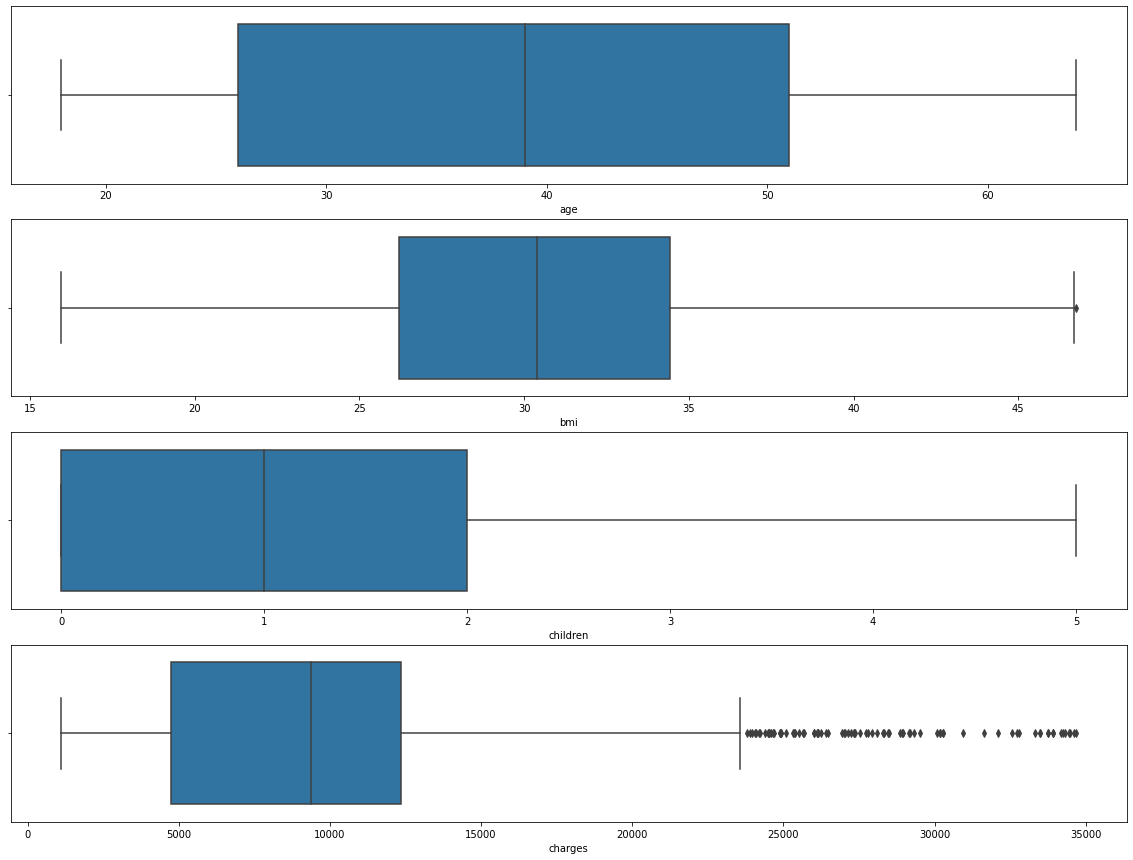

In [29]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas2.columns)):
    sns.boxplot(x=df_numericas2.columns[i], data=df_numericas2, ax=ax[i])
plt.show()